In [207]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

arr = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 1],
    [0, 1, 1, 1, 1, 0],
    [0, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0],
])

(2.0, 2.8333333333333335)

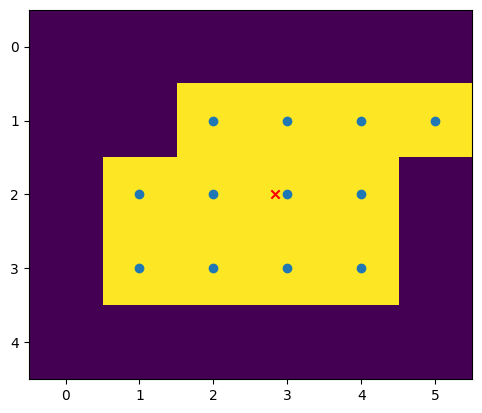

In [208]:
x,y = np.where(arr==1)
xm = np.mean(x)
ym = np.mean(y)

plt.imshow(arr)
plt.scatter(y,x)
plt.scatter(ym,xm, marker="x", color='r')

xm, ym

In [209]:
points = np.array([x,y])
val, vec = np.linalg.eig(np.dot(points-np.mean(points, axis=1)[:,None], (points-np.mean(points, axis=1)[:,None]).T))
vec_a = vec[:,val==val.min()]
vec_b = vec[:,val==val.max()]
val_a = val.max()
val_b = val.min()

print(vec)
print(val_a)
print(val_b)

[[-0.94084917  0.33882568]
 [-0.33882568 -0.94084917]]
19.10717674157291
6.559489925093761


In [210]:
# Ellipse
area = (arr==1).sum()
ratio = val_b/val_a
len_a = np.sqrt(ratio*area/np.pi)
len_b = len_a/ratio


vec_a = vec_a*len_a
vec_b = vec_b*len_b

In [211]:
print(vec_a)
print(vec_b)

[[-1.07738883]
 [-0.38799736]]
[[ 1.1301998 ]
 [-3.13833224]]


TypeError: _AxesBase.add_patch() got an unexpected keyword argument 'alpha'

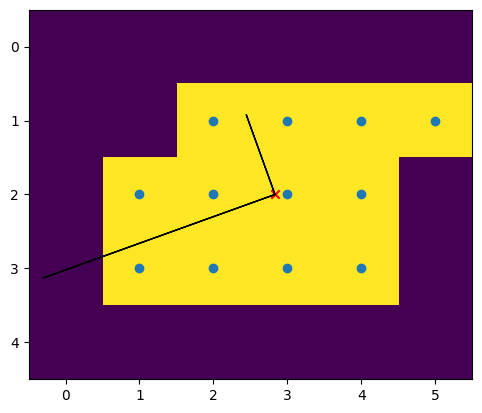

In [221]:
fig, ax = plt.subplots()
ax.imshow(arr)
ax.scatter(y,x)
ax.scatter(ym,xm, marker="x", color='r')
ax.arrow(ym, xm, vec_a[1].item(), vec_a[0].item())
ax.arrow(ym, xm, vec_b[1].item(), vec_b[0].item())
el = mpl.patches.Ellipse((ym,xm), 2*np.linalg.norm(vec_a-np.array([ym,xm])), 2*np.linalg.norm(vec_b-np.array([ym,xm])))
ax.add_patch(el, alpha=0.1)